# Naive Bayes on the basis of the Iris dataset

In [50]:
# Importing the basic libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [51]:
# Loading the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [53]:
# Finding two columns of the dataset that are suitable for the Naive Bayes algorithm
# By using just two features, 2D-plotting is possible
X1 = X[:, 0:2]
X2 = X[:, 1:3]
X3 = X[:, 2:4]

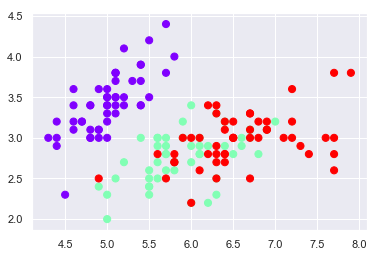

In [24]:
plt.scatter(X1[:, 0], X1[:, 1], c=y, s=50, cmap='rainbow');

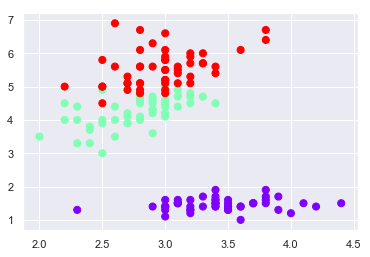

In [25]:
plt.scatter(X2[:, 0], X2[:, 1], c=y, s=50, cmap='rainbow');

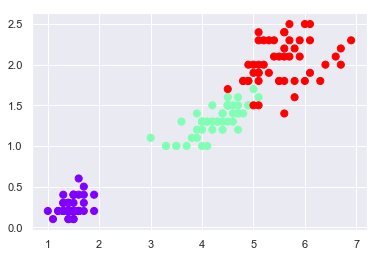

In [27]:
plt.scatter(X3[:, 0], X3[:, 1], c=y, s=50, cmap='rainbow');

X2 will be chosen for the application of the Naive Bayes algorithm as it looks suitable for our task.

In [55]:
# Splitting the dataset with the two features into train and test datasets
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X2, y, random_state=1)

In [56]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain);                 # 3. fit model to data

In [57]:
# Creating some random data for showing the borders of the classification in a graph
rng = np.random.RandomState(0)
Xnew = [2, 1] + [3, 6] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

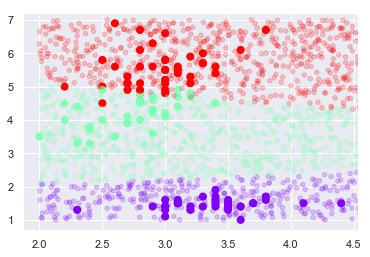

In [58]:
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ytrain, s=50, cmap='rainbow')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='rainbow', alpha=0.2)
plt.axis(lim);

In [59]:
# Checking the prediction quality with the test data
ypred = model.predict(Xtest)               # 4. predict on new data

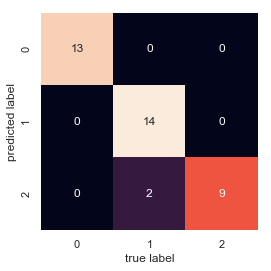

In [60]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.9473684210526315